# MNIST Even or Odd Classification 

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
print("Loading the MNIST data")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

#Transform labels to Binary (0 = Even, 1 = Odd)
y_train_binary = (y_train % 2).astype("float32")
y_test_binary = (y_test % 2).astype("float32")

print(f"Training data shape: {x_train.shape}")
print("Labels have been converted to Even (0) and Odd (1)")

Loading the MNIST data
Training data shape: (60000, 28, 28)
Labels have been converted to Even (0) and Odd (1)


In [6]:
# Build the Neural Network
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(64, activation='relu'),  
    layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
print("Training the model...")
history = model.fit(
    x_train, y_train_binary,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Training the model...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8216 - loss: 0.7546 - val_accuracy: 0.8616 - val_loss: 0.6554
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7987 - loss: 2.6577 - val_accuracy: 0.7386 - val_loss: 6.0444
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8047 - loss: 5.0173 - val_accuracy: 0.8256 - val_loss: 5.3462
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8053 - loss: 7.8923 - val_accuracy: 0.7502 - val_loss: 13.9222
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8032 - loss: 12.7166 - val_accuracy: 0.8100 - val_loss: 10.0994


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_binary)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8160 - loss: 9.8380

Test Accuracy: 0.8160


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


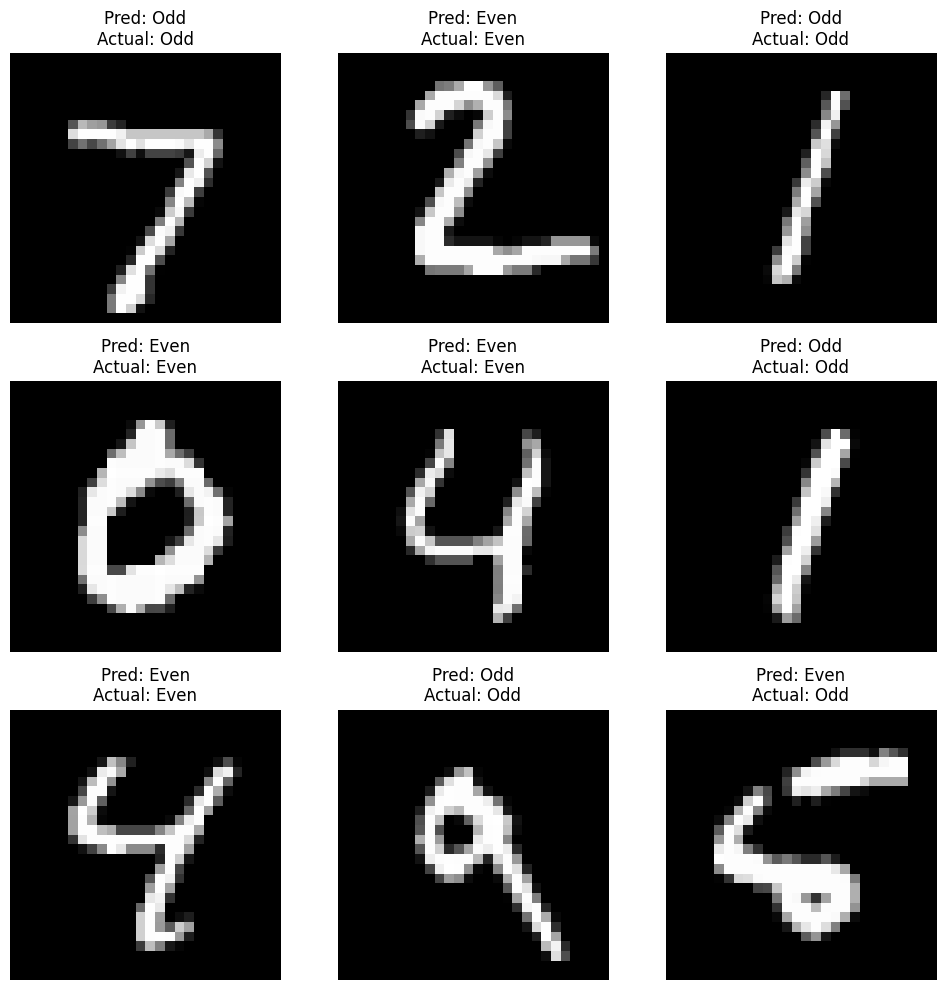

In [ ]:
# Predictions and visualize
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = "Odd" if predictions[i] > 0.5 else "Even"
    actual_label = "Odd" if y_test_binary[i] == 1 else "Even"
    plt.title(f"Pred: {pred_label}\nActual: {actual_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()